In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
clustering = pd.read_csv("data.csv")

In [3]:
clustering.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


### 1.Visualize the data using a scatter plot.  From the plot determine an appropriate value of k.

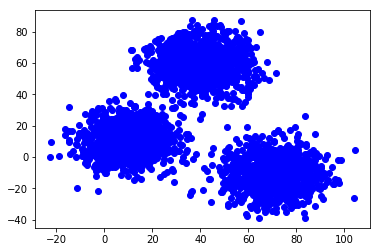

In [4]:
plt.scatter(clustering['V1'], clustering['V2'], color ="blue")
plt.show()

In [5]:
# From the scatter plot in Out[4] the appropriate k=3.

### 2. Multiple kMeans models from sklearn library using the            values of k from 1 to 10 
### 3. The within sum of squares for each value of k

In [6]:
#Import the necessary library from sklearn library
from sklearn.cluster import KMeans
#the library below is useful as it helps calculate the distance between the data points and their respective centroids. 
from scipy.spatial.distance import cdist

In [7]:
#We first need to redefine the data as numpy arrays in a list.
data = np.array(list(zip(clustering.V1, clustering.V2))).reshape(len(clustering.V1), 2)

#Here we get the centres for the different k values(1-10).
clusters =range(1,11)

#Below is an empty list that will contain the centroids for each k value (1-10)
wss_values =[] 

#The loop below does a few this:
for i in clusters: 
    #1.Fits the data into 10 clusters meaning 10 k-values
    kmeans = KMeans(n_clusters = i, init= 'k-means++')
    kmeans = kmeans.fit(data)
    
    #2.Using the cdist function, calculates the distance for each k-value between each datapoint and the centroids using the euclidean distance formula embedded in the library.
    wss_for_each_K = cdist(data, kmeans.cluster_centers_, 'euclidean')
    
    #3.From the distances gotten above using the cdist function.
    #The minimum value under each datapoint is selected as it classifies the datapoint to which cluster it belongs.
    #It then calculates the summation which gives you the within-sum of squares(distance)
    distance= sum(np.min( wss_for_each_K,axis=1))
    
    #4.The line below adds the wss for each datapoint to the empty list created at the beginning and print each of that.
    wss_values.append(distance)
    print("WSS values for {}". format(i), "=", wss_for_each_K)

WSS values for 1 = [[46.5474565 ]
 [23.75349018]
 [42.47386662]
 ...
 [41.01383527]
 [61.19175739]
 [53.55380939]]
WSS values for 2 = [[67.7678564  48.54343985]
 [57.69168672 24.37922551]
 [70.59281083 40.47411554]
 ...
 [ 5.04149608 61.6361833 ]
 [21.33973153 81.43602485]
 [15.47252742 73.78115688]]
WSS values for 3 = [[15.7742349  68.19954759 73.8545108 ]
 [ 9.87655463 58.08388842 49.47082274]
 [ 9.04449993 71.01508094 65.67785038]
 ...
 [58.92797927  5.47219431 74.13522418]
 [84.42182021 20.90805072 87.65757848]
 [65.83390192 15.5959933  87.98558269]]
WSS values for 4 = [[15.68159075 78.50799069 68.19954759 69.32127685]
 [ 9.96854778 53.80568071 58.08388842 45.68589386]
 [ 8.95812487 70.92592365 71.01508094 60.49059987]
 ...
 [58.96329997 72.35988881  5.47219431 76.78011682]
 [84.46519839 83.75565232 20.90805072 92.33377844]
 [65.85055404 86.51698923 15.5959933  90.1788623 ]]
WSS values for 5 = [[15.76519785 71.58914517 74.92504724 62.0819133  76.54295017]
 [ 9.91841303 48.08664064 

### 4. Use the value in 3 above to determine the most suitable value for k using the elbow method

Text(0.5, 1.0, 'The Elbow Graph showing the optimal K value')

Text(0.5, 0, 'K values')

Text(0, 0.5, 'WSS Values')

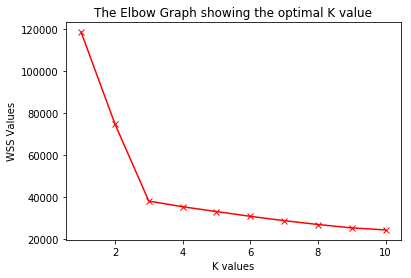

In [8]:
#The code below draws an elbow graph which shows the optimal k for this dataset to be used.
#It takes the value calculated distance in In[7] which is the sum for all the minimum wss' for all datapoints in the dataset.
plt.plot(clusters, wss_values, 'rx', ls ='solid' )
plt.title("The Elbow Graph showing the optimal K value")
plt.xlabel("K values")
plt.ylabel("WSS Values")
plt.show()

#### From the above Elbow Graph, the optimal k=3 since the curve bends between 2 and 4.

### 5. Use the k above to create a final kMeans model using the sklearn library

In [9]:
# the code below creates a KMean model using the values calculated above.
kmeans = KMeans(n_clusters = 3, init= 'k-means++', max_iter = 200)
kmeans = kmeans.fit(data)
centers= kmeans.cluster_centers_
predictions =kmeans.predict(data) 

### 6. Visualize the clusters from 5 above using a scatter plot. Ensure to show the clusters, their centroids and assignment of each point to a cluster. 

	

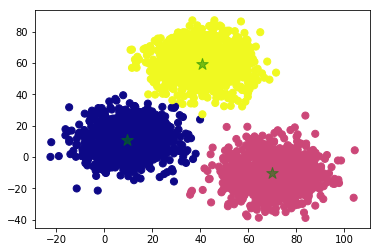

In [10]:
#From the image below the stars are the centroids for each cluster and the different clusters have been color-coded to show different clusters.
plt.scatter(data[:, 0], data[:, 1], c=predictions, s=50, cmap='plasma')
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=150, alpha=0.5, marker= '*');